## Question 1

## Question 2a

## Question 2b

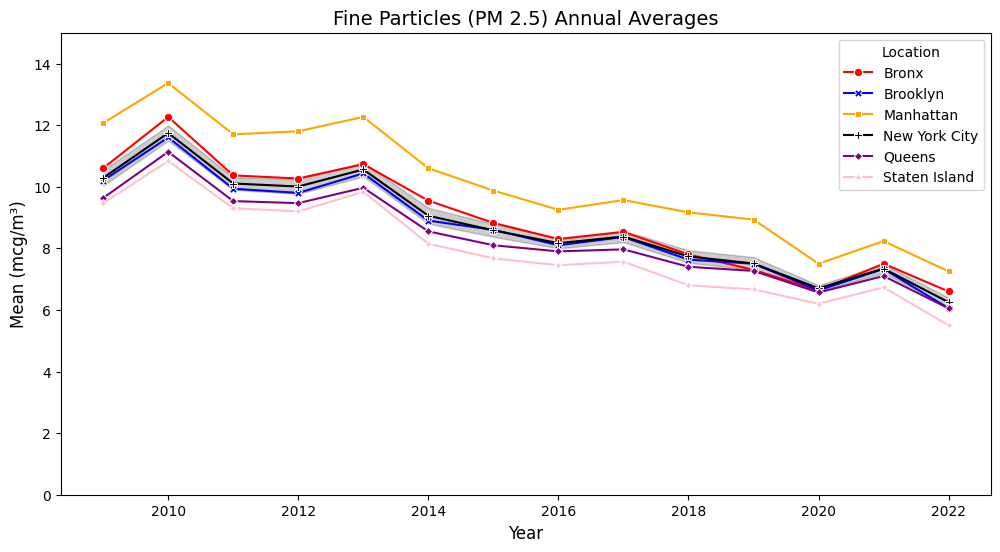

In [3]:
#| echo: true
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pm_annual_avg = pd.read_csv("pm_annual_avg.csv")

major_locations = ["New York City", "Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]

filtered_data = pm_annual_avg[pm_annual_avg["Geo Place Name"].isin(major_locations)]

palette = {
    "New York City": "black",
    "Bronx": "red",
    "Brooklyn": "blue",
    "Manhattan": "orange",
    "Queens": "purple",
    "Staten Island": "pink"
}

plt.figure(figsize=(12, 6))

# Create the line plot
sns.lineplot(
    data=filtered_data, 
    x="Year", 
    y="Data Value", 
    hue="Geo Place Name", 
    style="Geo Place Name", 
    markers=True, 
    dashes=False, 
    palette=palette
)

# Titles and labels
plt.title("Fine Particles (PM 2.5) Annual Averages", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean (mcg/m³)", fontsize=12)
plt.legend(title="Location")
plt.ylim(0, 15)  # Adjust the y-axis to match the original range

# Show the plot
plt.show()

## Question 3

/var/folders/qs/_lhr02x10x33snm5wyrb3s700000gn/T/ipykernel_61663/3272663569.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/qs/_lhr02x10x33snm5wyrb3s700000gn/T/ipykernel_61663/3272663569.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


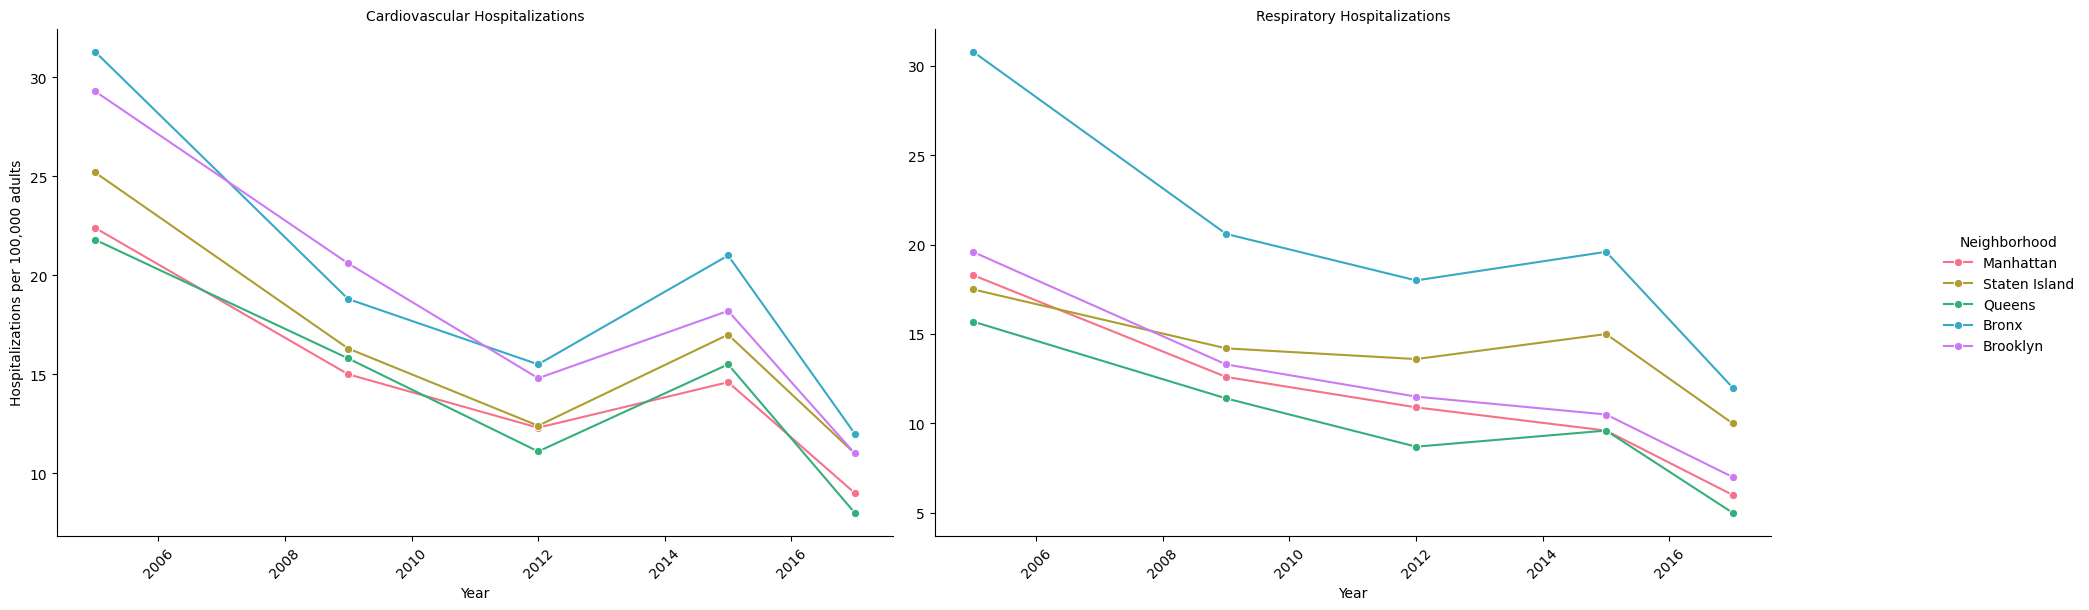

In [10]:
#| echo: true
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cardiovascular = df[df["Name"].str.contains("Cardiovascular hospitalizations due to PM2.5", case=False, na=False) & 
                        (df["Geo Type Name"] == "Borough")].copy()

df_respiratory = df[df["Name"].str.contains("Respiratory hospitalizations due to PM2.5", case=False, na=False) & 
                     (df["Geo Type Name"] == "Borough")].copy()


df_cardiovascular['year'] = pd.to_datetime(df_cardiovascular['Start Date']).dt.year
df_respiratory['year'] = pd.to_datetime(df_respiratory['Start Date']).dt.year

df_combined = pd.concat([df_cardiovascular, df_respiratory])

df_combined.loc[:, "Geo Type Name"] = df_combined["Geo Type Name"].fillna("Unknown")
# Merge both datasets for a combined FacetGrid approach
df_cardiovascular['Geo Type Name'] = "Cardiovascular"
df_respiratory['Geo Type Name'] = "Respiratory"
df_combined = pd.concat([df_cardiovascular, df_respiratory])

# Define color palette for better distinction
palette = sns.color_palette("husl", df_combined['Geo Place Name'].nunique())

# Create FacetGrid to show two subplots in a single structure
g = sns.FacetGrid(df_combined, col="Geo Type Name", hue="Geo Place Name", palette=palette, height=6, aspect=1.5, sharex=True, sharey=False)

# Map a lineplot onto the FacetGrid
g.map(sns.lineplot, "year", "Data Value", marker="o")

# Add titles and labels
g.set_axis_labels("Year", "Hospitalizations per 100,000 adults")
g.set_titles(col_template="{col_name} Hospitalizations")
g.add_legend(title="Neighborhood", bbox_to_anchor=(1, 0.5), loc="center left")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Display the plot
plt.show()
